<a href="https://colab.research.google.com/github/viffsi/attrition/blob/master/improve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check which columns has the highest impact to the label

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

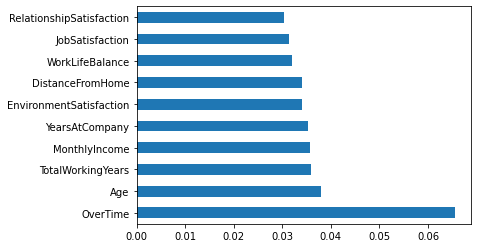

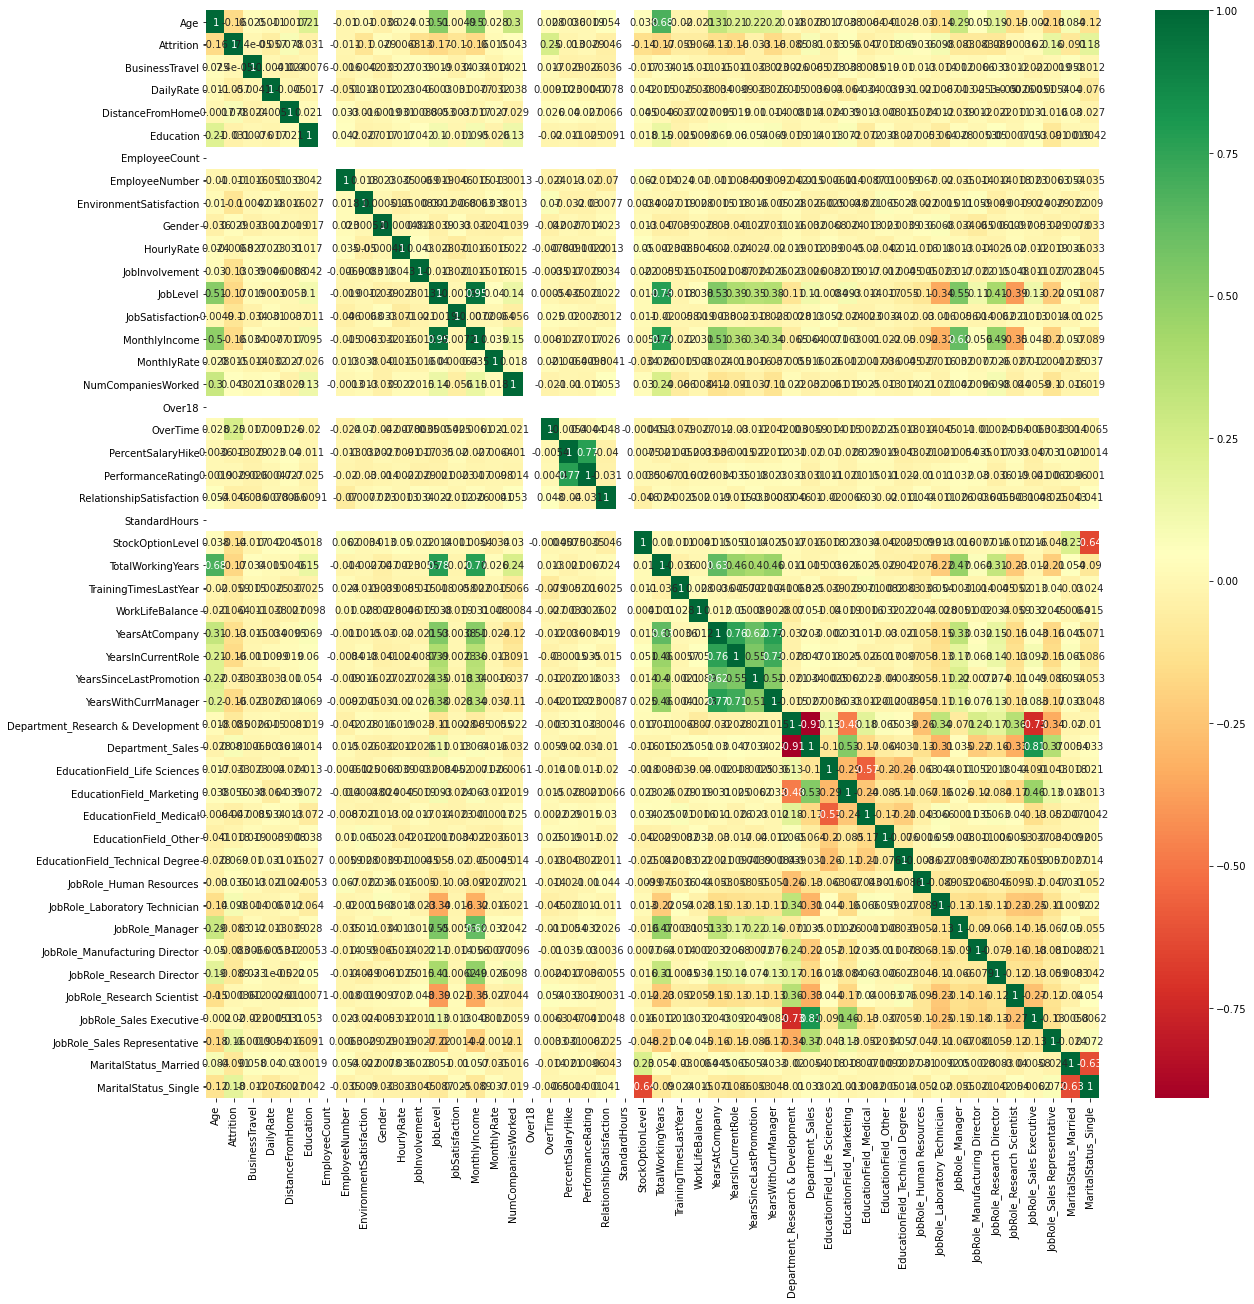

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

names = ['Age', 'Attrition', 'BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
df = pd.read_csv('/content/EmployeeAttrition.csv',header = 0,names=names)
print(df.info())

df_encode = MultiColumnLabelEncoder(columns = ['Attrition','BusinessTravel','Gender','Over18','OverTime']).fit_transform(df)

df_encode = pd.get_dummies(df_encode, prefix_sep='_', drop_first=True)

X = df_encode.drop(columns='Attrition')
Y = df_encode['Attrition']

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

model = ExtraTreesClassifier()
model.fit(X,Y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

corrmat = df_encode.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_encode[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [86]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
import csv as csv
import pandas as pd, xgboost, numpy, textblob, string
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import os
from sklearn.compose import ColumnTransformer
from sklearn import tree


names = ['Age', 'Attrition', 'BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
df = pd.read_csv('/content/EmployeeAttrition.csv',header = 0,names=names)

#print(df.info())
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)


#print(df.info())
#labelEncoder = 'Attrition','BusinessTravel','Gender','Over18','OverTime'
#onehotEncoder = 'Department','EducationField','JobRole','MaritalStatus'
#df_encode = MultiColumnLabelEncoder(columns = ['Attrition','BusinessTravel','Gender','Over18','OverTime']).fit_transform(df)
#print(df_encode.info())
df_encode = pd.get_dummies(df, prefix_sep='_', drop_first=True)
#print(df_encode.info())
X = np.array(df_encode.drop(columns='Attrition_Yes'))
Y = np.array(df_encode['Attrition_Yes'])
#X = preprocessing.scale(X)
sc = StandardScaler()
X = sc.fit_transform(X) 
#print(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
gnb = GaussianNB()
clf = svm.SVR()
lnr = LinearRegression()
dcs = tree.DecisionTreeClassifier()
gnb.fit(X_train, Y_train)
clf.fit(X_train, Y_train)
lnr.fit(X_train, Y_train)
dcs.fit(X_train, Y_train)
print("naive bayes = " ,gnb.score(X_test, Y_test))
print("SVM = " ,clf.score(X_test, Y_test))
print("LinearRegression = " ,lnr.score(X_test, Y_test))
print("DecisionTree = " ,dcs.score(X_test, Y_test))
#tree.plot_tree(dcs.fit(X_train, Y_train)) 

naive bayes =  0.6530612244897959
SVM =  0.24463274776361443
LinearRegression =  0.2284156640081563
DecisionTree =  0.7959183673469388
